In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN


#### Loading Data

In [45]:
os.chdir('C:\\Users\\Richard\\Downloads\\Data')
# Print the current working directory

In [46]:
#giving the chart a style
sns.set_style('darkgrid')

In [47]:
powerco = pd.read_csv('powerco.csv')
price = pd.read_csv('price_features.csv')
powerco = powerco.iloc[:, 1:]
price = price.iloc[:, 1:]

#### Data Exploring

In [48]:
price.head()

,id,mean_year_price_p1_var,mean_year_price_p3_var,mean_year_price_p2_var,mean_year_price_p1_fix,mean_year_price_p3_fix,mean_year_price_p2_fix,mean_year_price_off_peak,mean_year_price_mid_peak,mean_year_price_peak,...,mean_m11_price_peak,mean_m12_price_p1_var,mean_m12_price_p3_var,mean_m12_price_p2_var,mean_m12_price_p1_fix,mean_m12_price_p3_fix,mean_m12_price_p2_fix,mean_m12_price_off_peak,mean_m12_price_mid_peak,mean_m12_price_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,16.353854,24.524832,...,24.539003,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,16.328003,24.486748,...,24.532715,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,16.360964,24.532715
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [49]:
powerco.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,contract_yrs,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,3.0,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,7.0,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,6.0,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,6.0,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,6.0,0


In [50]:
df_merged = powerco.merge(price,on='id',how='left')
df_merged.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,...,mean_m11_price_peak,mean_m12_price_p1_var,mean_m12_price_p3_var,mean_m12_price_p2_var,mean_m12_price_p1_fix,mean_m12_price_p3_fix,mean_m12_price_p2_fix,mean_m12_price_off_peak,mean_m12_price_mid_peak,mean_m12_price_peak
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,1,0.00,25.44,25.44,2,...,24.537124,0.146033,0.085483,0.000000,44.266930,0.00000,0.000000,44.412963,0.000000,0.085483
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,0,0.00,16.38,16.38,1,...,0.000000,0.147600,0.000000,0.000000,44.444710,0.00000,0.000000,44.592310,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,0,0.00,28.60,28.60,1,...,0.088409,0.167798,0.088409,0.000000,44.444710,0.00000,0.000000,44.612508,0.000000,0.088409
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,0,0.00,30.22,30.22,1,...,0.000000,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000,44.593296,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,0,52.32,44.91,44.91,1,...,24.539003,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003


#### Detecting Outliers

In [51]:
#lets create a new dataframe to plot a boxplot of all numerical values
powerco_int = powerco.loc[:, [ 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max','contract_yrs', 'churn',
       ]]

In [52]:
columns_no = len(powerco_int.columns)
columns_no

13

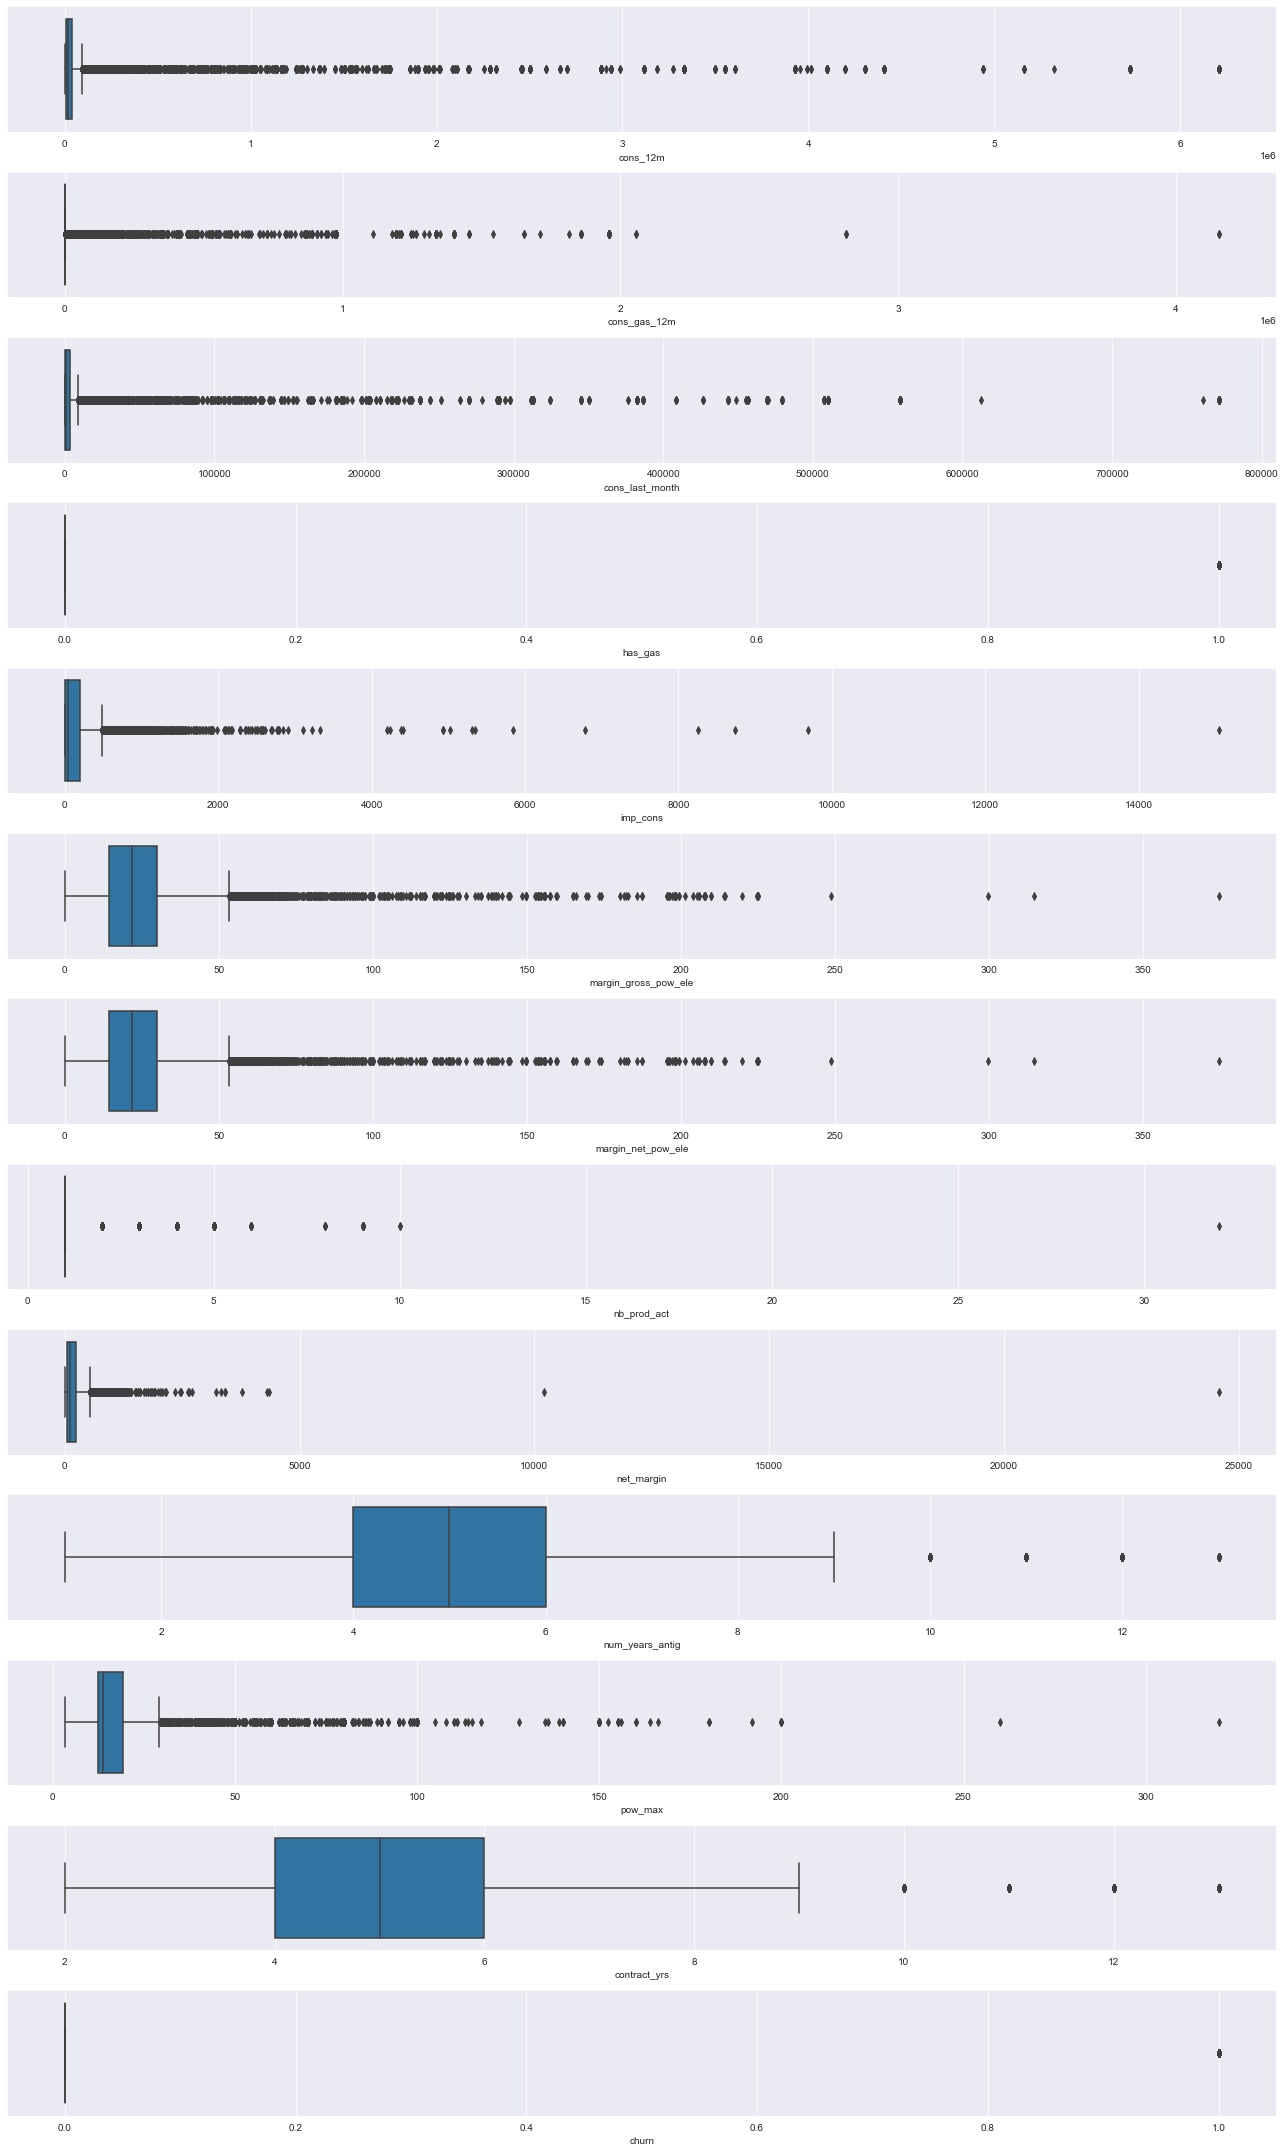

In [53]:
fig,axes = plt.subplots(nrows=13, figsize=(18,30))
for i, column in enumerate(powerco_int.columns):
    sns.boxplot(x=powerco[column],ax=axes[i])
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()
        

#### Standardizing Features with outliers

Lets transform the features with many outliers the reduce numbers of outliers and impact on the model

In [54]:
#getting the variables to transform 
cols_to_transform = ['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'pow_max']
data_to_transform = np.array(powerco[cols_to_transform])

In [55]:
#transforming the data
power_transformer = PowerTransformer(method='yeo-johnson')
transformed_data = power_transformer.fit_transform(data_to_transform)

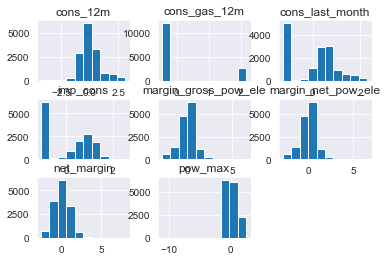

In [56]:
#creating a dataframe for the transformed data
df_transformed = pd.DataFrame(transformed_data, columns=cols_to_transform)
df_transformed.hist();

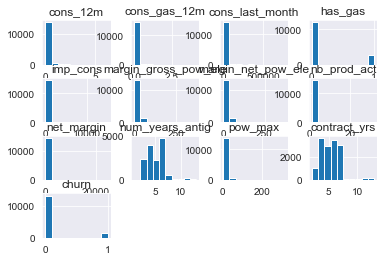

In [57]:
powerco.hist();

In [58]:
#dropping the original data and concatinating the data with the transformed data
powerco_tf = pd.concat([df_merged.drop(columns=cols_to_transform),df_transformed],axis=1)
powerco_tf.head()

,id,channel_sales,has_gas,nb_prod_act,num_years_antig,origin_up,contract_yrs,churn,mean_year_price_p1_var,mean_year_price_p3_var,...,mean_m12_price_mid_peak,mean_m12_price_peak,cons_12m,cons_gas_12m,cons_last_month,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,1,2,3,lxidpiddsbxsbosboudacockeimpuepw,3.0,1,0.124787,0.100749,...,0.000000,0.085483,-4.280929,2.160341,-1.251502,-1.091185,0.283169,0.283340,1.791643,1.909689
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,7.0,0,0.149609,0.007124,...,0.000000,0.000000,-0.646618,-0.466538,-1.251502,-1.091185,-0.309938,-0.309785,-1.292575,-0.187722
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,6.0,0,0.170512,0.088421,...,0.000000,0.088409,-1.644613,-0.466538,-1.251502,-1.091185,0.456609,0.456783,-1.820661,-0.174248
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,6.0,0,0.151210,0.000000,...,0.000000,0.000000,-1.154945,-0.466538,-1.251502,-1.091185,0.540636,0.540811,-1.115530,-0.339792
4,149d57cf92fc41cf94415803a877cb4b,MISSING,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,6.0,0,0.124174,0.103638,...,16.365274,24.539003,-0.671315,-0.466538,0.199090,0.431872,1.192666,1.192845,-0.697666,0.796082


In [59]:
powerco_tf = powerco_tf.iloc[:,1:] #we are removing the id column
powerco_tf.head()

,channel_sales,has_gas,nb_prod_act,num_years_antig,origin_up,contract_yrs,churn,mean_year_price_p1_var,mean_year_price_p3_var,mean_year_price_p2_var,...,mean_m12_price_mid_peak,mean_m12_price_peak,cons_12m,cons_gas_12m,cons_last_month,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max
0,foosdfpfkusacimwkcsosbicdxkicaua,1,2,3,lxidpiddsbxsbosboudacockeimpuepw,3.0,1,0.124787,0.100749,0.066530,...,0.000000,0.085483,-4.280929,2.160341,-1.251502,-1.091185,0.283169,0.283340,1.791643,1.909689
1,MISSING,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,7.0,0,0.149609,0.007124,0.000000,...,0.000000,0.000000,-0.646618,-0.466538,-1.251502,-1.091185,-0.309938,-0.309785,-1.292575,-0.187722
2,foosdfpfkusacimwkcsosbicdxkicaua,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,6.0,0,0.170512,0.088421,0.000000,...,0.000000,0.088409,-1.644613,-0.466538,-1.251502,-1.091185,0.456609,0.456783,-1.820661,-0.174248
3,lmkebamcaaclubfxadlmueccxoimlema,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,6.0,0,0.151210,0.000000,0.000000,...,0.000000,0.000000,-1.154945,-0.466538,-1.251502,-1.091185,0.540636,0.540811,-1.115530,-0.339792
4,MISSING,0,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,6.0,0,0.124174,0.103638,0.072865,...,16.365274,24.539003,-0.671315,-0.466538,0.199090,0.431872,1.192666,1.192845,-0.697666,0.796082


In [60]:
#since our model is not feasible with null values we drop them
powerco_tf = powerco_tf.dropna()

In [61]:
powerco_tf.columns

Index(['channel_sales', 'has_gas', 'nb_prod_act', 'num_years_antig',
       'origin_up', 'contract_yrs', 'churn', 'mean_year_price_p1_var',
       'mean_year_price_p3_var', 'mean_year_price_p2_var',
       ...
       'mean_m12_price_mid_peak', 'mean_m12_price_peak', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'net_margin', 'pow_max'],
      dtype='object', length=132)

In [62]:
#converting our string varibles to numerical variables
df_dummies = pd.get_dummies(powerco_tf)
df_dummies

,has_gas,nb_prod_act,num_years_antig,contract_yrs,churn,mean_year_price_p1_var,mean_year_price_p3_var,mean_year_price_p2_var,mean_year_price_p1_fix,mean_year_price_p3_fix,...,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,1,2,3,3.0,1,0.124787,0.100749,0.066530,40.942265,22.352010,...,1,0,0,0,0,0,0,0,1,0
1,0,1,6,7.0,0,0.149609,0.007124,0.000000,44.311375,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,0,1,6,6.0,0,0.170512,0.088421,0.000000,44.385450,0.000000,...,1,0,0,0,0,0,1,0,0,0
3,0,1,6,6.0,0,0.151210,0.000000,0.000000,44.400265,0.000000,...,0,1,0,0,0,0,1,0,0,0
4,0,1,6,6.0,0,0.124174,0.103638,0.072865,40.688156,24.412893,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,1,2,4,4.0,0,0.144124,0.000000,0.000000,44.370635,0.000000,...,1,0,0,0,0,0,0,0,1,0
14602,0,1,3,4.0,1,0.106799,0.095406,0.070817,59.015674,36.393379,...,1,0,0,0,0,0,0,0,1,0
14603,0,1,4,4.0,1,0.124338,0.103794,0.073160,40.701732,24.421038,...,1,0,0,0,0,0,0,0,1,0
14604,0,1,3,4.0,0,0.149609,0.007124,0.000000,44.311375,0.000000,...,1,0,0,0,0,0,0,0,1,0


### Modelling

#### Decision Tree Classifier

In [63]:
#creating my X and y variable
X = df_dummies[df_dummies.columns.difference(['churn'])]
y = df_dummies['churn']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [65]:
model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0)
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = model.predict(X_test)

In [67]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2620
           1       0.19      0.21      0.20       284

    accuracy                           0.84      2904
   macro avg       0.55      0.56      0.55      2904
weighted avg       0.84      0.84      0.84      2904



### NOTE
Based on our eda thte data consist of approximately 10% churners and 90% Non_churner. This is an imbalance dataset as our model will be biased towards Non_churners.i.e.(Over fitting: giving more accuracy to our trainning set)
<br>
#### Solution
<br>
We fix this by Resampling our dataset(Upsampling)

In [69]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [70]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [71]:
model_smote = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0)
model_smote.fit(Xr_train,yr_train)

DecisionTreeClassifier()

In [72]:
y_pred_smote = model.predict(Xr_test)

In [73]:
print(classification_report(yr_test,y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      1748
           1       0.97      0.41      0.57      2450

    accuracy                           0.65      4198
   macro avg       0.75      0.69      0.63      4198
weighted avg       0.79      0.65      0.62      4198



#### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model_rf = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

In [76]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred_rf = model_rf.predict(X_test)

In [78]:
print(classification_report(y_test,y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2620
           1       0.65      0.08      0.14       284

    accuracy                           0.91      2904
   macro avg       0.78      0.54      0.54      2904
weighted avg       0.88      0.91      0.87      2904



In [79]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [80]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [81]:
model_rf_smote = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

In [82]:
model_rf_smote.fit(Xr_train,yr_train)
y_pred_rf_smote = model_rf_smote.predict(Xr_test)

In [83]:
print(classification_report(yr_test,y_pred_rf_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1719
           1       0.97      0.94      0.96      2493

    accuracy                           0.95      4212
   macro avg       0.94      0.95      0.95      4212
weighted avg       0.95      0.95      0.95      4212



### Evaluation Metric


### Recall
<br>
We want a model with high Recall i.e we want to accurately identify all churners
<br>
So, a good churn prediction model would ideally have <b>high recall</b> to capture most churners and <b>high precision</b> to avoid flagging too many false positives, ensuring that the efforts to retain customers are focused on those most likely to leave.

Hence <b>The Random Forest model</b> is a better model

### Model Understanding

In [84]:
feature_importances = pd.DataFrame({'features':X_train.columns,
                                  'importance':model.feature_importances_}).sort_values(by='importance',ascending=True).reset_index()

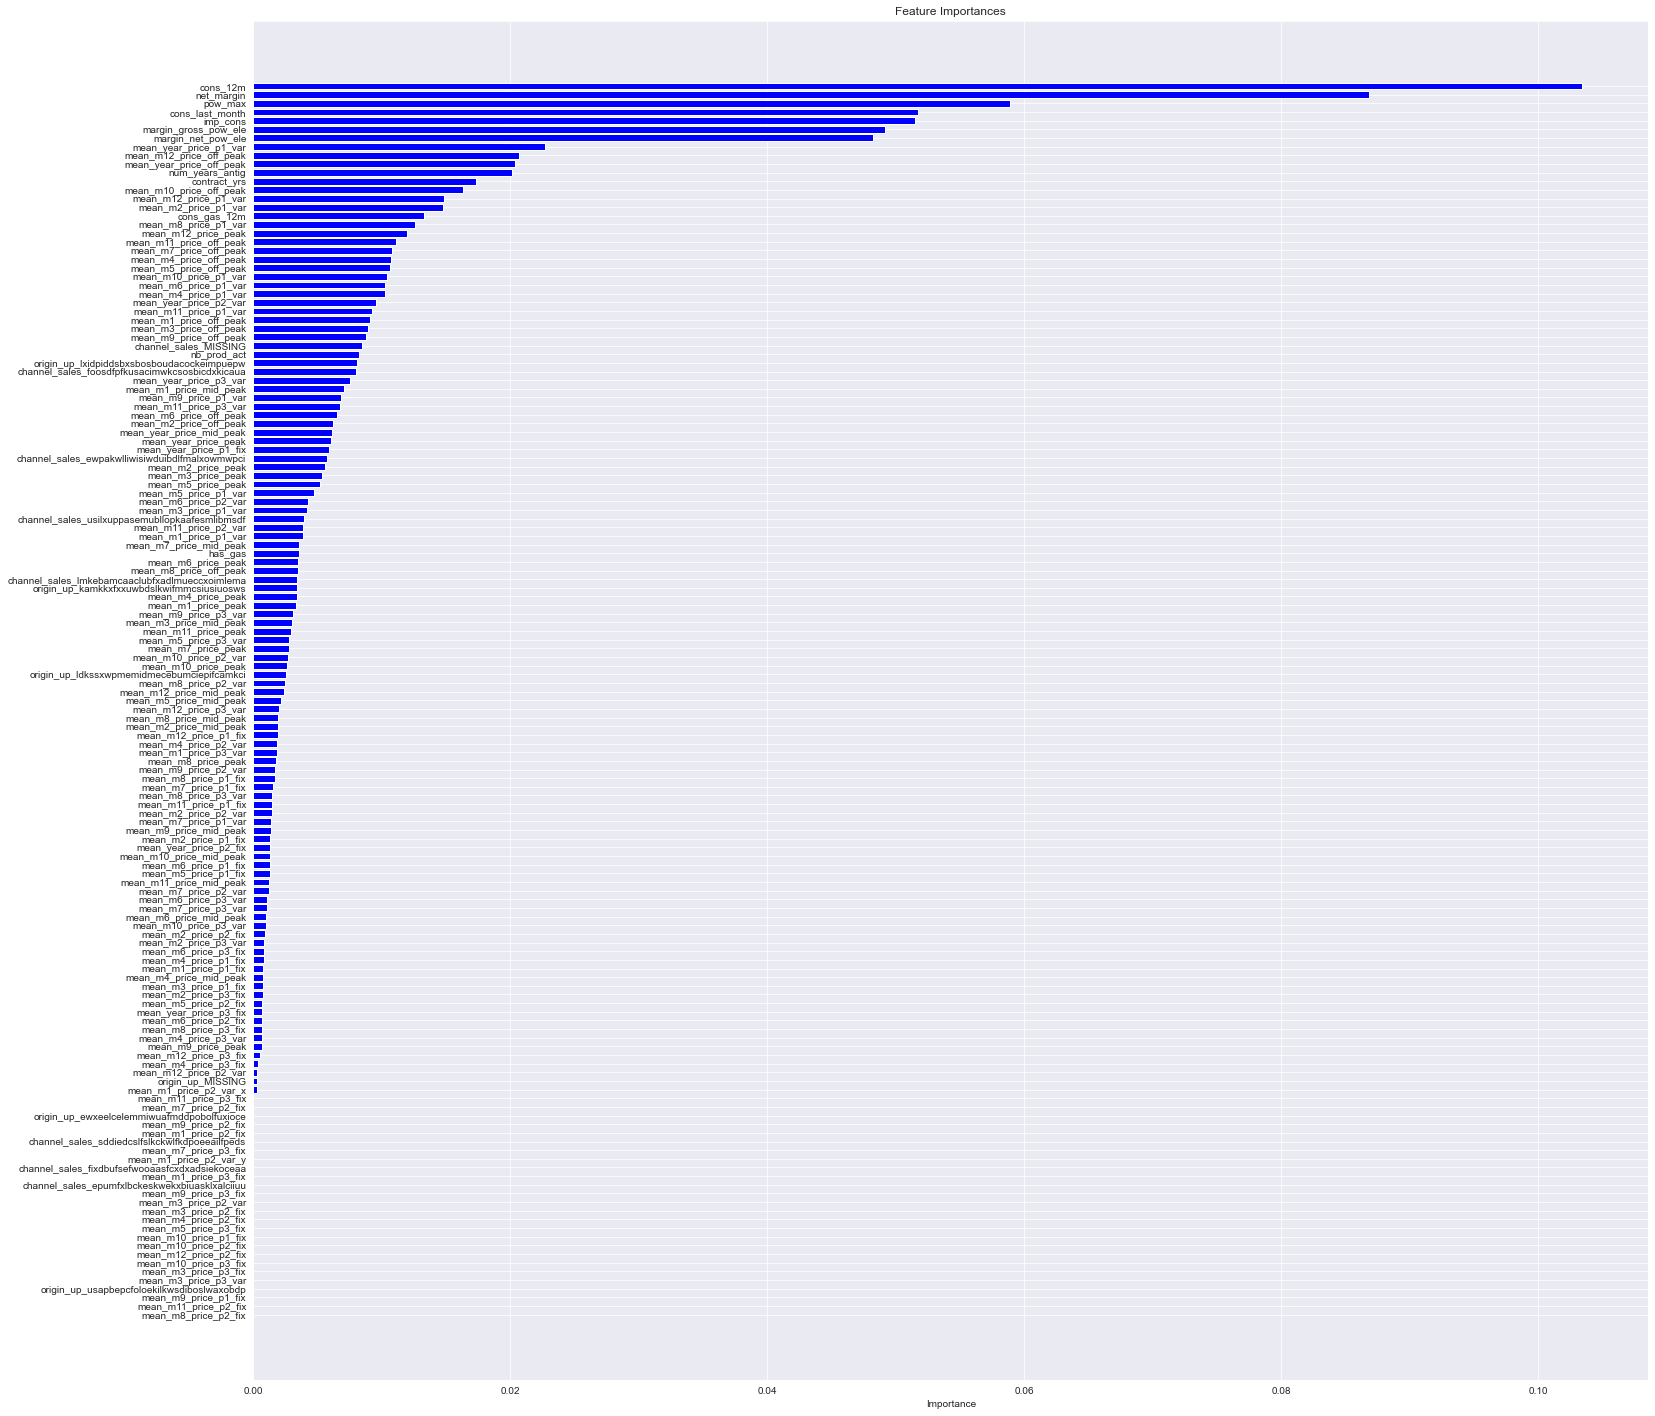

In [85]:
plt.figure(figsize=(25, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],
color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:
- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active,
31
their tenure and the number of months since they updated their contract
- Our price sensitivity features are scattered around but are not the main driver for a customer
churning
The last observation is important because this relates back to our original hypothesis:


> Is churn driven by the customers' price sensitivity?
Based on the output of the feature importances, it is not a main driver but it is a weak contributor.
However, to arrive at a conclusive result, more experimentation is needed.